In [19]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import itertools
from xgboost import plot_importance, to_graphviz
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import random


In [21]:
X=pd.read_csv("X_train_pp.csv",header=None)
Y=pd.read_csv("y_train.csv",header=None)

In [22]:
name=pd.read_csv("column_names.csv",header=None)

In [23]:
X_val=pd.read_csv("X_val_pp.csv",header=None)
Y_val=pd.read_csv("y_val.csv",header=None)

In [24]:
X['click'] = Y


In [25]:
from sklearn.utils import resample
X0 = resample(X[X['click']==0],replace = False, 
                                n_samples = 40000, 
                                random_state = 27)
X1=X[X['click']==1]

In [26]:
X = pd.concat([X0, X1])

In [27]:
Y=X['click']

In [28]:
del X['click']

In [29]:
model=XGBClassifier(n_estimators = 500, max_depth = 6, learning_rate = 0.1, random_state = 100)

In [30]:
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [46]:
pred = model.predict(X_val)
pred_prob = model.predict_proba(X_val)
pred_prob_click = [p[1] for p in pred_prob]

In [36]:
# pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Y_val['pred']=pred

In [45]:
# del Y_val['pred']

In [48]:
roc_auc_score(Y_val, pred_prob_click)

0.6764397148222245

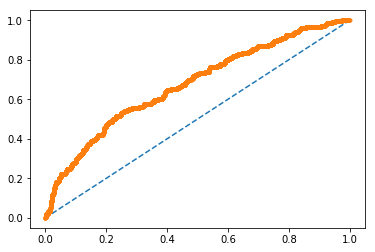

In [50]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(Y_val, pred_prob_click)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [74]:
#modify the threshould to predict 
thres=0.04
pred=pred_prob_click
pred=np.array(pred)
pred[pred>thres]=1
pred[pred<=thres]=0



In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val,pred))
print(confusion_matrix(Y_val, pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85    303723
           1       0.00      0.53      0.00       202

   micro avg       0.74      0.74      0.74    303925
   macro avg       0.50      0.64      0.43    303925
weighted avg       1.00      0.74      0.85    303925

[[226198  77525]
 [    94    108]]


In [6]:
#train with original data
#xgboost

In [5]:
# xgb_res, xgb_sub = FitAndEvaluateClassifier(XGBClassifier(n_estimators = 500, max_depth = 8, learning_rate = 0.1, random_state = rand_seed), 
#                                             features_rf)
# params1 = {'learning_rate': 0.1, 
#           'n_estimators': 500, 
#           'objective': 'binary:logistic', 
#           'max_depth': 8, 
#           'min_child_weight': 5, 
#           'max_delta_step': 1
#          } 

In [6]:
# xgbDmat_train = xgb.DMatrix(X, Y)
# xgbDmat_test = xgb.DMatrix(X_val, Y_val)

KeyboardInterrupt: 

In [ ]:
# xgbC = xgb.train(params1, xgbDmat_train)